In [10]:
import pandas as pd
import numpy as np

# Load your CSV data
data = pd.read_csv('West.csv')

# Avoid first column for analysis
X = data.iloc[:, 1:]

data.shape
X.head(4)

,Bus ODESSA 2 0 V pu,Bus ODESSA 2 0 V angle,Bus ODESSA 2 0 Frequency,Bus PRESIDIO 2 0 V pu,Bus PRESIDIO 2 0 V angle,Bus PRESIDIO 2 0 Frequency,Bus O DONNELL 1 0 V pu,Bus O DONNELL 1 0 V angle,Bus O DONNELL 1 0 Frequency,Bus O DONNELL 1 1 V pu,...,Bus MCCAMEY 2 0 Frequency,Bus LAMESA 0 V pu,Bus LAMESA 0 V angle,Bus LAMESA 0 Frequency,Bus GOLDSMITH 0 V pu,Bus GOLDSMITH 0 V angle,Bus GOLDSMITH 0 Frequency,Bus RALLS 2 0 V pu,Bus RALLS 2 0 V angle,Bus RALLS 2 0 Frequency
0,0.9842,-23.0372,60.0000,1.0225,-19.3905,60.0000,1.0131,-17.5830,60.0000,1.0175,...,60.0000,0.9874,-21.7774,60.0000,1.0200,-16.6213,60.0000,1.0318,-31.5607,60.0
1,0.9843,-23.0325,60.0002,1.0225,-19.3836,60.0002,1.0131,-17.5823,60.0000,1.0175,...,60.0000,0.9875,-21.7757,60.0001,1.0201,-16.6137,60.0003,1.0318,-31.5607,60.0
2,0.9843,-23.0284,60.0003,1.0226,-19.3783,60.0003,1.0131,-17.5817,60.0000,1.0175,...,60.0003,0.9875,-21.7746,60.0001,1.0201,-16.6109,60.0003,1.0318,-31.5602,60.0
3,0.9843,-23.0244,60.0003,1.0226,-19.3731,60.0003,1.0131,-17.5802,60.0001,1.0175,...,60.0003,0.9875,-21.7731,60.0001,1.0201,-16.6077,60.0003,1.0318,-31.5600,60.0


In [11]:
import pandas as pd

# Function to standardize the data
def standardize_data(data):
    # Calculate mean and standard deviation for each column
    means = data.mean(axis=0)
    stds = data.std(axis=0)
    
    # Standardize the data
    X_standardized = (data - means) / stds
    
    return X_standardized, means, stds

# Input CSV file path
input_csv_file = 'input.csv'

# Read the data from the input CSV file
data = pd.read_csv(input_csv_file)

# Standardize the data and get means and standard deviations
X_standardized, means, stds = standardize_data(data)

# Output CSV file path for standardized data
output_csv_file = 'standardised_data.csv'

# Write the standardized data to a new CSV file
X_standardized.to_csv(output_csv_file, index=False)
print("Standardized data saved to", output_csv_file)

# Output CSV file path for means and standard deviations
stats_output_csv_file = 'mean_std_dev.csv'

# Create a DataFrame for means and standard deviations
stats_df = pd.DataFrame({'Mean': means, 'Standard_Deviation': stds})

# Write means and standard deviations to a new CSV file
stats_df.to_csv(stats_output_csv_file)
print("Means and standard deviations saved to", stats_output_csv_file)


Standardized data saved to standardized_data.csv
Means and standard deviations saved to mean_std_dev.csv


In [12]:
# Compute the covariance matrix
cov_matrix = np.cov(X_standardized, rowvar=False)
cov_matrix.shape

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvectors and eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [13]:
# Specify the number of principal components you want to keep
n_components = 10  # Adjust as needed

# Construct principal components
principal_components = eigenvectors[:, :n_components]

In [14]:
# Project the original data onto the principal components
X_pca = np.dot(X_standardized, principal_components)

# Create a DataFrame for the compressed data
compressed_data = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Save the compressed data to a CSV file
output_file_path = 'pca_output.csv'
compressed_data.to_csv(output_file_path, index=False)

print(f"Compressed data saved to {output_file_path}")

Compressed data saved to pca_output.csv


In [15]:
# Reconstruct all columns from the compressed data
reconstructed_data = np.dot(X_pca, principal_components.T)

# Create a DataFrame for the reconstructed data
reconstructed_df = pd.DataFrame(reconstructed_data, columns=X.columns)

# Save the reconstructed data to a CSV file
output_reconstructed_file_path = 'reconstructed_data.csv'
reconstructed_df.to_csv(output_reconstructed_file_path, index=False)

print(f"Reconstructed data saved to {output_reconstructed_file_path}")


Reconstructed data saved to reconstructed_data.csv


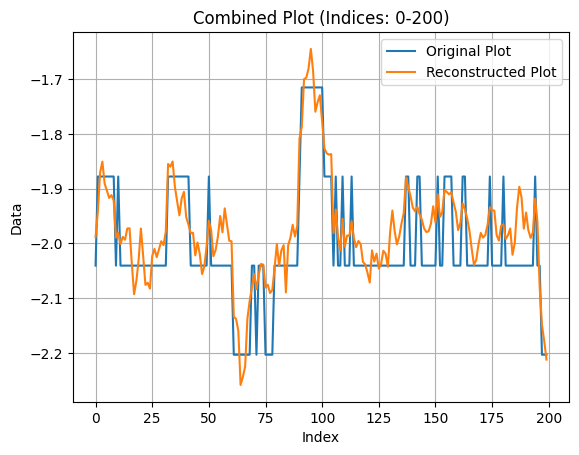

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to load data from CSV file and select data points within a specific range
def load_and_select_data(file_path, column_index, start_index, end_index):
    reconstructed_column_data = pd.read_csv(file_path)
    data_from_column = reconstructed_column_data.iloc[:, column_index]
    return data_from_column[start_index:end_index]

# Define file paths
file_path_1 = 'standardized_data.csv'
file_path_2 = 'reconstructed_data.csv'

# Define the range of indices for the data points to be included in the plot
start_index = 0
end_index = 200                         

# Load and select data for the first plot
data_from_second_column_1 = load_and_select_data(file_path_1, 0, start_index, end_index)

# Load and select data for the second plot
data_from_second_column_2 = load_and_select_data(file_path_2, 0, start_index, end_index)

# Plot both sets of data on the same plot
plt.plot(data_from_second_column_1, label='Original Plot')
plt.plot(data_from_second_column_2, label='Reconstructed Plot')
plt.title(f'Combined Plot (Indices: {start_index}-{end_index})')
plt.xlabel('Index')
plt.ylabel('Data')
plt.grid(True)
plt.legend()  # Add legend to distinguish between the two plots
plt.show()
    

In [28]:
import pandas as pd

# Function to reverse standardization
def reverse_standardization(reconstructed_data, means, stds):
    # Reverse the standardization
    original_data = (reconstructed_data * stds) + means
    return original_data

# Input CSV file paths
reconstructed_data_csv_file = 'reconstructed_data.csv'
mean_std_dev_csv_file = 'mean_std_dev.csv'

# Read the standardized data from the CSV file
reconstructed_data = pd.read_csv(reconstructed_data_csv_file)

# Read means and standard deviations from the CSV file
mean_std_dev_data = pd.read_csv(mean_std_dev_csv_file)

# Extract means and standard deviations
means = mean_std_dev_data['Mean'].values
stds = mean_std_dev_data['Standard_Deviation'].values

# Reverse the standardization to obtain the original data
original_data = reverse_standardization(reconstructed_data, means, stds)

# Output CSV file path for original data
output_csv_file = 'original_data.csv'

# Write the original data to a new CSV file
original_data.to_csv(output_csv_file, index=False)
print("Original data saved to", output_csv_file)

# Original data
original_data_str = """Bus ODESSA 2 0 V pu,Bus ODESSA 2 0 V angle,Bus ODESSA 2 0 Frequency,Bus PRESIDIO 2 0 V pu,Bus PRESIDIO 2 0 V angle,Bus PRESIDIO 2 0 Frequency,Bus O DONNELL 1 0 V pu,Bus O DONNELL 1 0 V angle,Bus O DONNELL 1 0 Frequency,Bus O DONNELL 1 1 V pu,Bus O DONNELL 1 1 V angle,Bus O DONNELL 1 1 Frequency,Bus BIG SPRING 5 0 V pu,Bus BIG SPRING 5 0 V angle,Bus BIG SPRING 5 0 Frequency,Bus BIG SPRING 5 1 V pu,Bus BIG SPRING 5 1 V angle,Bus BIG SPRING 5 1 Frequency,Bus VAN HORN 0 V pu,Bus VAN HORN 0 V angle,Bus VAN HORN 0 Frequency,Bus IRAAN 2 0 V pu,Bus IRAAN 2 0 V angle,Bus IRAAN 2 0 Frequency,Bus IRAAN 2 1 V pu,Bus IRAAN 2 1 V angle,Bus IRAAN 2 1 Frequency,Bus PRESIDIO 1 0 V pu,Bus PRESIDIO 1 0 V angle,Bus PRESIDIO 1 0 Frequency,Bus PRESIDIO 1 1 V pu,Bus PRESIDIO 1 1 V angle,Bus PRESIDIO 1 1 Frequency,Bus SANDERSON 0 V pu,Bus SANDERSON 0 V angle,Bus SANDERSON 0 Frequency,Bus MONAHANS 2 0 V pu,Bus MONAHANS 2 0 V angle,Bus MONAHANS 2 0 Frequency,Bus GRANDFALLS 0 V pu,Bus GRANDFALLS 0 V angle,Bus GRANDFALLS 0 Frequency,Bus MARFA 0 V pu,Bus MARFA 0 V angle,Bus MARFA 0 Frequency,Bus GARDEN CITY 0 V pu,Bus GARDEN CITY 0 V angle,Bus GARDEN CITY 0 Frequency,Bus ODESSA 4 0 V pu,Bus ODESSA 4 0 V angle,Bus ODESSA 4 0 Frequency,Bus NOTREES 0 V pu,Bus NOTREES 0 V angle,Bus NOTREES 0 Frequency,Bus MIDLAND 4 0 V pu,Bus MIDLAND 4 0 V angle,Bus MIDLAND 4 0 Frequency,Bus BIG SPRING 1 0 V pu,Bus BIG SPRING 1 0 V angle,Bus BIG SPRING 1 0 Frequency,Bus BIG SPRING 1 1 V pu,Bus BIG SPRING 1 1 V angle,Bus BIG SPRING 1 1 Frequency,Bus O DONNELL 2 0 V pu,Bus O DONNELL 2 0 V angle,Bus O DONNELL 2 0 Frequency,Bus O DONNELL 2 1 V pu,Bus O DONNELL 2 1 V angle,Bus O DONNELL 2 1 Frequency,Bus ODESSA 6 0 V pu,Bus ODESSA 6 0 V angle,Bus ODESSA 6 0 Frequency,Bus BIG SPRINGS 0 V pu,Bus BIG SPRINGS 0 V angle,Bus BIG SPRINGS 0 Frequency,Bus BIG SPRINGS 1 V pu,Bus BIG SPRINGS 1 V angle,Bus BIG SPRINGS 1 Frequency,Bus MIDLAND 2 0 V pu,Bus MIDLAND 2 0 V angle,Bus MIDLAND 2 0 Frequency,Bus COAHOMA 0 V pu,Bus COAHOMA 0 V angle,Bus COAHOMA 0 Frequency,Bus MIDLAND 3 0 V pu,Bus MIDLAND 3 0 V angle,Bus MIDLAND 3 0 Frequency,Bus ALPINE 0 V pu,Bus ALPINE 0 V angle,Bus ALPINE 0 Frequency,Bus FORT DAVIS 0 V pu,Bus FORT DAVIS 0 V angle,Bus FORT DAVIS 0 Frequency,Bus MCCAMEY 1 0 V pu,Bus MCCAMEY 1 0 V angle,Bus MCCAMEY 1 0 Frequency,Bus KERMIT 0 V pu,Bus KERMIT 0 V angle,Bus KERMIT 0 Frequency,Bus ODESSA 1 0 V pu,Bus ODESSA 1 0 V angle,Bus ODESSA 1 0 Frequency,Bus ALPINE 1 0 V pu,Bus ALPINE 1 0 V angle,Bus ALPINE 1 0 Frequency,Bus ALPINE 1 1 V pu,Bus ALPINE 1 1 V angle,Bus ALPINE 1 1 Frequency,Bus MARFA 1 0 V pu,Bus MARFA 1 0 V angle,Bus MARFA 1 0 Frequency,Bus MARFA 1 1 V pu,Bus MARFA 1 1 V angle,Bus MARFA 1 1 Frequency,Bus MIDLAND 1 0 V pu,Bus MIDLAND 1 0 V angle,Bus MIDLAND 1 0 Frequency,Bus SEMINOLE 0 V pu,Bus SEMINOLE 0 V angle,Bus SEMINOLE 0 Frequency,Bus BIG SPRING 3 0 V pu,Bus BIG SPRING 3 0 V angle,Bus BIG SPRING 3 0 Frequency,Bus ODESSA 5 0 V pu,Bus ODESSA 5 0 V angle,Bus ODESSA 5 0 Frequency,Bus BIG SPRING 4 0 V pu,Bus BIG SPRING 4 0 V angle,Bus BIG SPRING 4 0 Frequency,Bus ODESSA 3 0 V pu,Bus ODESSA 3 0 V angle,Bus ODESSA 3 0 Frequency,Bus ODESSA 3 1 V pu,Bus ODESSA 3 1 V angle,Bus ODESSA 3 1 Frequency,Bus BIG SPRING 2 0 V pu,Bus BIG SPRING 2 0 V angle,Bus BIG SPRING 2 0 Frequency,Bus ALPINE 2 0 V pu,Bus ALPINE 2 0 V angle,Bus ALPINE 2 0 Frequency,Bus MARFA 2 0 V pu,Bus MARFA 2 0 V angle,Bus MARFA 2 0 Frequency,Bus MIDLAND 0 V pu,Bus MIDLAND 0 V angle,Bus MIDLAND 0 Frequency,Bus MONAHANS 1 0 V pu,Bus MONAHANS 1 0 V angle,Bus MONAHANS 1 0 Frequency,Bus MCCAMEY 2 0 V pu,Bus MCCAMEY 2 0 V angle,Bus MCCAMEY 2 0 Frequency,Bus SEMINOLE 1 0 V pu,Bus SEMINOLE 1 0 V angle,Bus SEMINOLE 1 0 Frequency,Bus MCCAMEY 0 V pu,Bus MCCAMEY 0 V angle,Bus MCCAMEY 0 Frequency,Bus MONAHANS 0 V pu,Bus MONAHANS 0 V angle,Bus MONAHANS 0 Frequency,Bus ODESSA 0 V pu,Bus ODESSA 0 V angle,Bus ODESSA 0 Frequency"""

# Parsing the original data
parsed_data = original_data_str.split(',')

# Storing data in a dictionary
bus_data = {}
for item in parsed_data:
    parts = item.split()
    bus_name = ' '.join(parts[1:-3])  # Extracting bus name
    parameter = parts[-3]  # Extracting parameter (e.g., V pu, V angle, Frequency)
    value = parts[-1]  # Extracting value
    if bus_name not in bus_data:
        bus_data[bus_name] = {}
    bus_data[bus_name][parameter] = value

# Printing the formatted output
print("Bus Data:")
for bus, parameters in bus_data.items():
    print(bus)
    for parameter, value in parameters.items():
        print(f"- {parameter}: {value}")


Original data saved to original_data.csv
Bus Data:
ODESSA 2
- 0: angle
ODESSA
- 2: Frequency
- 4: Frequency
- 6: Frequency
- 1: Frequency
- 5: Frequency
- 3: Frequency
- 0: angle
PRESIDIO 2
- 0: angle
PRESIDIO
- 2: Frequency
- 1: Frequency
O DONNELL 1
- 0: angle
- 1: angle
O DONNELL
- 1: Frequency
- 2: Frequency
BIG SPRING 5
- 0: angle
- 1: angle
BIG SPRING
- 5: Frequency
- 1: Frequency
- 3: Frequency
- 4: Frequency
- 2: Frequency
VAN HORN
- 0: angle
VAN
- HORN: Frequency
IRAAN 2
- 0: angle
- 1: angle
IRAAN
- 2: Frequency
PRESIDIO 1
- 0: angle
- 1: angle
SANDERSON
- 0: angle

- SANDERSON: Frequency
- GRANDFALLS: Frequency
- MARFA: Frequency
- NOTREES: Frequency
- COAHOMA: Frequency
- ALPINE: Frequency
- KERMIT: Frequency
- SEMINOLE: Frequency
- MIDLAND: Frequency
- MCCAMEY: Frequency
- MONAHANS: Frequency
- ODESSA: Frequency
MONAHANS 2
- 0: angle
MONAHANS
- 2: Frequency
- 1: Frequency
- 0: angle
GRANDFALLS
- 0: angle
MARFA
- 0: angle
- 1: Frequency
- 2: Frequency
GARDEN CITY
- 0: angle

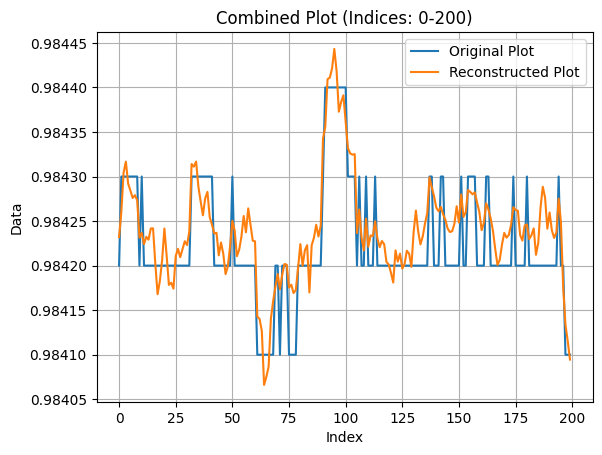

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to load data from CSV file and select data points within a specific range
def load_and_select_data(file_path, column_index, start_index, end_index):
    reconstructed_column_data = pd.read_csv(file_path)
    data_from_column = reconstructed_column_data.iloc[:, column_index]
    return data_from_column[start_index:end_index]

# Define file paths
file_path_1 = 'input.csv'
file_path_2 = 'original_data.csv'

# Define the range of indices for the data points to be included in the plot
start_index = 0
end_index = 200                         

# Load and select data for the first plot
data_from_second_column_1 = load_and_select_data(file_path_1, 0, start_index, end_index)

# Load and select data for the second plot
data_from_second_column_2 = load_and_select_data(file_path_2, 0, start_index, end_index)

# Plot both sets of data on the same plot
plt.plot(data_from_second_column_1, label='Original Plot')
plt.plot(data_from_second_column_2, label='Reconstructed Plot')
plt.title(f'Combined Plot (Indices: {start_index}-{end_index})')
plt.xlabel('Index')
plt.ylabel('Data')
plt.grid(True)
plt.legend()  # Add legend to distinguish between the two plots
plt.show()
    